In [1]:
#=_


In [167]:
from PIL import Image
import numpy as np
import math

In [163]:
def img2matrix(img):
    return np.asarray(img).copy()
def matrix2img(matrix):
    return Image.fromarray(matrix)

# printing basic info of the image and its matrix

In [145]:
def basicInfo():
    img = Image.open("sceneColored.jpg")
    print("(width x height )",img.size)
    grayImg = img.convert('L')
    imgMatrix= np.asarray(grayImg)
    print("(row x col )",imgMatrix.shape)
    print("\n\nmatrix representaion\n",imgMatrix)
    print("showing color img")
    img.show()
    print("showing gray image")
    grayImg.show()

In [146]:
basicInfo() 

(width x height ) (293, 172)
(row x col ) (172, 293)


matrix representaion
 [[129 129 129 ...  98  98  98]
 [130 130 130 ...  97  97  97]
 [132 132 132 ...  96  96  96]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
showing color img
showing gray image


## image nagation

In [185]:
def imgNagation(img): # takes image as input 
    imgMatrix = img2matrix(img)
    imgMatrix = imgMatrix 
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            imgMatrix[i][j] = 255 - imgMatrix[i][j]  # new pixelvalue = (max pixel value of the grayscale image) - old pixel value 
    return matrix2img(imgMatrix)

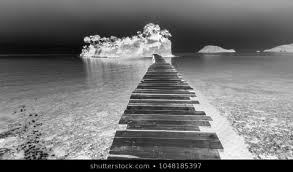

In [186]:
img = Image.open("sceneColored.jpg").convert('L')
nagImg = imgNagation(img)
nagImg

***
***
# GRAYSCALE INTO BINARY IMAGE 

In [187]:
def binaryImg(img,threshold= 127): # floor(255/2)
    imgMatrix = img2matrix(img)   
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            if imgMatrix[i][j] > threshold:
                imgMatrix[i][j] = 255
            else:
                imgMatrix[i][j] = 0
                
    return matrix2img(imgMatrix)


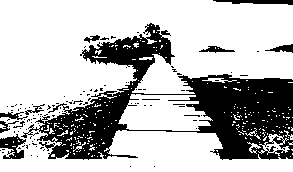

In [243]:
img = Image.open("sceneColored.jpg").convert('L')
threshold = 100
binaryImg(img,threshold) # change threshold value between 0 to 255, to get different nature of the image


***
***
#   LOG TRANSFORMATION
### general form of log transformation :
###                                  s = c log(1+r) ;
##### where s is a new pixel value , r is a old pixel value and c is a scaling constant. The value of c is chosen such that we get the maximum output value corresponding to the bit size used. e.g for 8 bit image, c is chosen such that we get max value equal to 255.


In [244]:
def logTransformation(img):
    imgMatrix = img2matrix(img)
    c = 255/(math.log(1 + 255)) # c = 255/(log(1 + max_input_pixel_value))
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            imgMatrix[i][j] = c * math.log(1+imgMatrix[i][j])
    return matrix2img(imgMatrix)

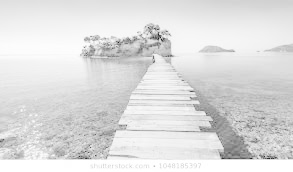

In [245]:
img = Image.open("sceneColored.jpg").convert('L')
logTransformation(img)

---
***

# POWER LAW (GAMMA) TRANSFORMATION 
### general form of gamma transformation:
### &nbsp;&nbsp;&nbsp;  s = c *r <sup>γ<sup>

In [246]:
def powerLaw(img,gamma):
    imgMatrix = img2matrix(img)
    c = int(255/(255**gamma))
    for i in range(imgMatrix.shape[0]):
        for j in range(imgMatrix.shape[1]):
            imgMatrix[i][j] = c * imgMatrix[i][j]**gamma
    return matrix2img(imgMatrix)


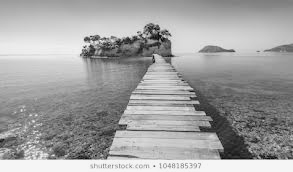

In [247]:
img = Image.open("sceneColored.jpg").convert('L')
gamma = 0.67
powerLaw(img,gamma) ## change the gamma value to see the different result

***
---

# CONTRAST STRETCHING , THRESHOLDING , CLIPPING